<a href="https://colab.research.google.com/github/JJuwan/2025-1-myclass-BDA/blob/main/inclass/05w_B_wed_0402_easy_ch05_06_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
2.2.2
2.0.2
0.13.2


In [3]:
df_raw = pd.DataFrame({'var1' : [1, 2, 1],
                       'var2' : [2, 3, 2],
                       'var3' : [10, 20, 30]})
df_raw

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [4]:
df_new = df_raw.copy()
df_new

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [5]:
df_new.rename(columns = {'var2': 'v2'})

,var1,v2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [6]:
df_raw

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [7]:
df_new.rename(columns = {'var2': 'v2'}, inplace=True)
df_new

,var1,v2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [8]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df.rename(columns={"A": "a", "B": "c"})

,a,c
0,1,4
1,2,5
2,3,6


In [9]:
df

,A,B
0,1,4
1,2,5
2,3,6


## 파생변수 생성

In [10]:
df = pd.DataFrame({'var1' : [4, 3, 8],
                   'var2' : [2, 6, 1]})
df

,var1,var2
0,4,2
1,3,6
2,8,1


In [13]:
df1 = df.copy()
df1

,var1,var2
0,4,2
1,3,6
2,8,1


In [14]:
df1['var1']

,var1
0,4
1,3
2,8


In [15]:
df1['var1'] + df1['var2']

,0
0,6
1,9
2,9


In [16]:
df1['var_sum'] = df1['var1'] + df1['var2']

In [17]:
df1

,var1,var2,var_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [19]:
df1['var_mean'] = (df1['var1'] + df1['var2']) / 2
df1

,var1,var2,var_sum,var_mean
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5


In [20]:
df2 = df.copy()
df2

,var1,var2
0,4,2
1,3,6
2,8,1


In [21]:
df2.sum()

,0
var1,15
var2,9


In [22]:
df2.sum(axis=0)

,0
var1,15
var2,9


In [23]:
df2.sum(axis=1)

,0
0,6
1,9
2,9


In [25]:
df2['var_sum'] = df2.sum(axis=1)
df2

,var1,var2,var_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [27]:
df2['var_sum'] = df2.sum(axis='columns')
df2

,var1,var2,var_sum
0,4,2,12
1,3,6,18
2,8,1,18


In [28]:
df2[['var1', 'var2']]

,var1,var2
0,4,2
1,3,6
2,8,1


In [29]:
df2[['var1', 'var2']].mean()

,0
var1,5.0
var2,3.0


In [30]:
df2[['var1', 'var2']].mean(axis=1)

,0
0,3.0
1,4.5
2,4.5


In [31]:
df2['var_mean'] = df2[['var1', 'var2']].mean(axis=1)
df2

,var1,var2,var_sum,var_mean
0,4,2,12,3.0
1,3,6,18,4.5
2,8,1,18,4.5


In [32]:
df1

,var1,var2,var_sum,var_mean
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5


## mpg 연비 변수 생성

In [34]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 5.36 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [35]:
mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [42]:
mpg.sample(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
147,nissan,maxima,3.0,1999,6,auto(l4),f,18,26,r,midsize
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
208,volkswagen,gti,2.0,1999,4,auto(l4),f,19,26,r,compact


In [43]:
mpg.cty

,cty
0,18
1,21
2,20
3,21
4,16
...,...
229,19
230,21
231,16
232,18


In [44]:
mpg.cty + mpg.hwy

,0
0,47
1,50
2,51
3,51
4,42
...,...
229,47
230,50
231,42
232,44


In [45]:
(mpg.cty + mpg.hwy) / 2

,0
0,23.5
1,25.0
2,25.5
3,25.5
4,21.0
...,...
229,23.5
230,25.0
231,21.0
232,22.0


In [46]:
mpg.total = (mpg.cty + mpg.hwy) / 2
mpg.head()

<ipython-input-46-0e68e0222155>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  mpg.total = (mpg.cty + mpg.hwy) / 2


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [48]:
mpg['total'] = (mpg.cty + mpg.hwy) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [49]:
mpg['mpg_mean'] = mpg[['cty', 'hwy']].mean(axis='columns')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,21.0


In [50]:
sum(mpg.total) / len(mpg)

20.14957264957265

In [52]:
mpg.total.mean()

np.float64(20.14957264957265)

In [53]:
mpg['total'].mean()

np.float64(20.14957264957265)

## 조건문 활용

In [54]:
mpg.total.describe()

,0
count,234.000000
mean,20.149573
std,5.050290
min,10.500000
25%,15.500000
50%,20.500000
75%,23.500000
max,39.500000


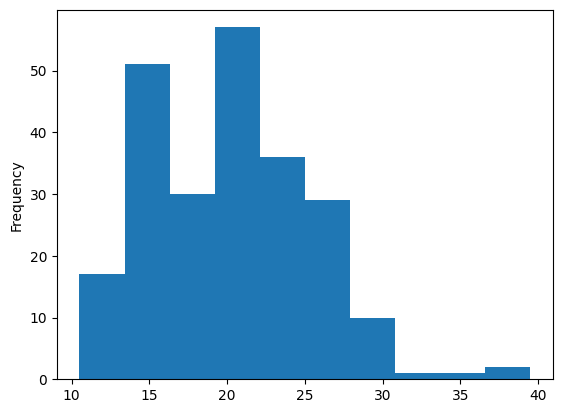

In [56]:
mpg.total.plot.hist();

In [58]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 44.7 MB/s eta 0:00:00


In [59]:
import koreanize_matplotlib

In [61]:
%config LnlineBackend.fogure_format = 'retina'

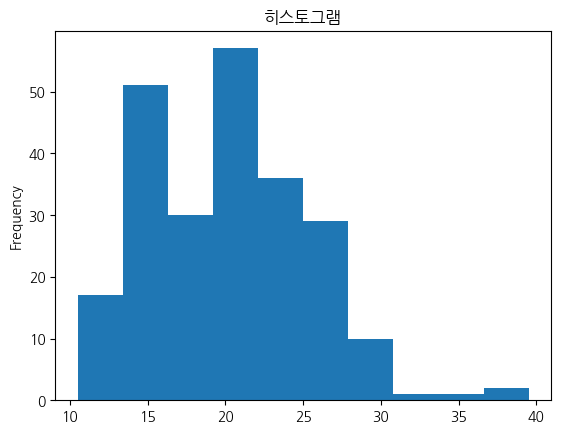

In [62]:
mpg['total'].plot(kind="hist", title="히스토그램");

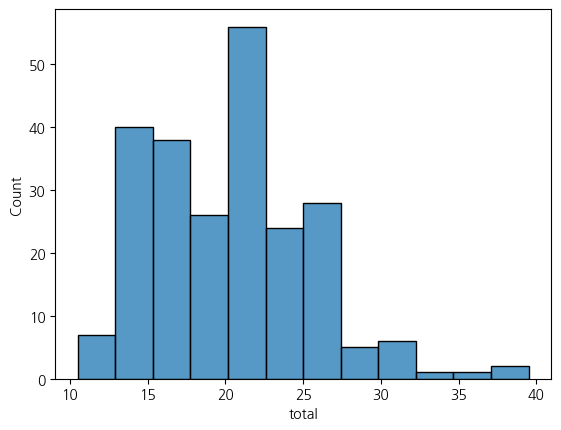

In [64]:
import seaborn as sns

sns.histplot(mpg, x="total"); # x=mpg.total

In [66]:
np.where(30 >= 5, "pass", 'fail')

array('pass', dtype='<U4')

In [67]:
np.where(30 <= 5, "pass", 'fail')

array('fail', dtype='<U4')

In [68]:
np.where(mpg.total >= 20, 'pass', 'fail')

array(['pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass',
       'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'fail',
       'pass', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'pass',
       'fail', 'pass', 'pass', 'fail', 'fail', 'fail', 'fail', 'fail',
       'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'fail',
       'fail', 'pass', 'pass', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'pass', 'pass', 'pass', 'pass', 'fail', 'fail',
       'fail', 'fail', 'fail', 'pass', 'pass', 'pass', 'pass', 'pass',
       'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass',
      

In [73]:
mpg['test'] = np.where(mpg.total >= 20, 'pass', 'fail')
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test
89,ford,f150 pickup 4wd,5.4,2008,8,auto(l4),4,13,17,r,pickup,15.0,15.0,fail
153,nissan,pathfinder 4wd,5.6,2008,8,auto(s5),4,12,18,p,suv,15.0,15.0,fail
34,chevrolet,malibu,3.1,1999,6,auto(l4),f,18,26,r,midsize,22.0,22.0,pass
119,hyundai,tiburon,2.7,2008,6,auto(l4),f,17,24,r,subcompact,20.5,20.5,pass
93,ford,mustang,4.0,2008,6,auto(l5),r,16,24,r,subcompact,20.0,20.0,pass


In [74]:
mpg.test.value_counts()

,count
test,
pass,128
fail,106


In [75]:
type(mpg.test.value_counts())

pandas.core.series.Series

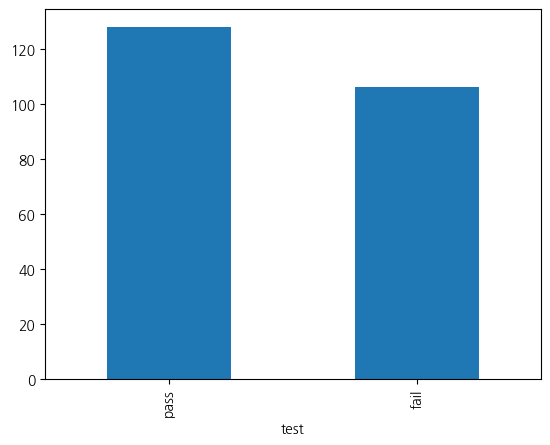

In [77]:
mpg.test.value_counts().plot.bar();

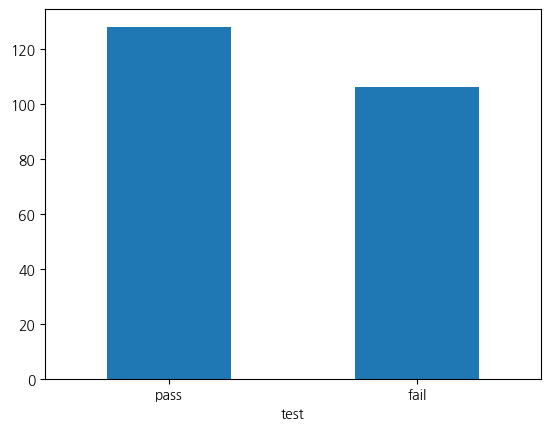

In [78]:
mpg.test.value_counts().plot.bar(rot=0);

<Axes: xlabel='test', ylabel='count'>

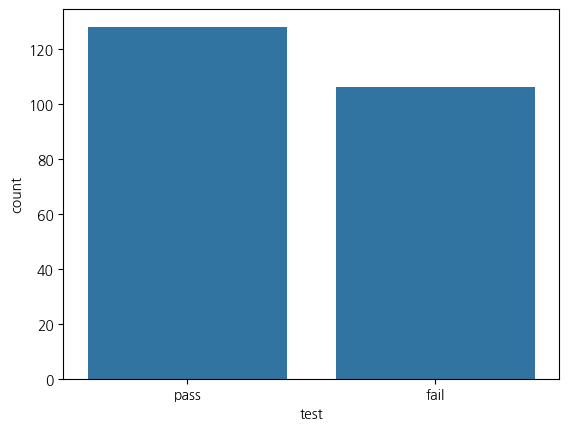

In [79]:
sns.countplot(mpg, x='test')

<Axes: xlabel='test', ylabel='count'>

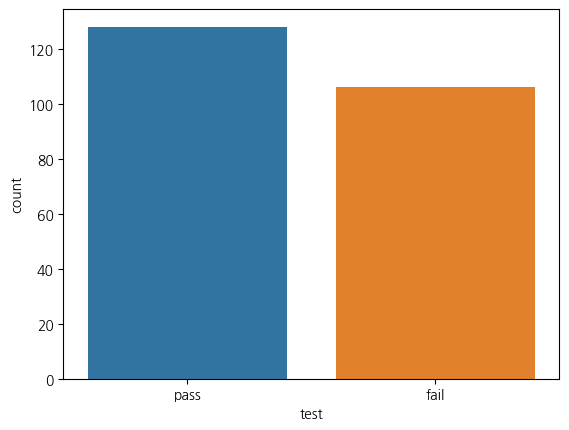

In [81]:
sns.countplot(mpg, x='test', hue='test')

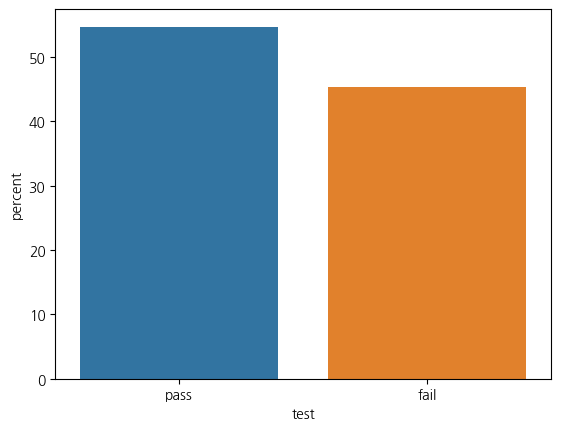

In [82]:
sns.countplot(mpg, x='test', hue='test', stat='percent');

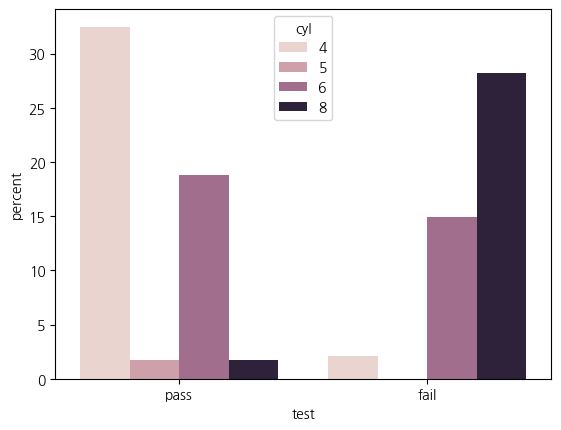

In [83]:
sns.countplot(mpg, x='test', hue='cyl', stat='percent');

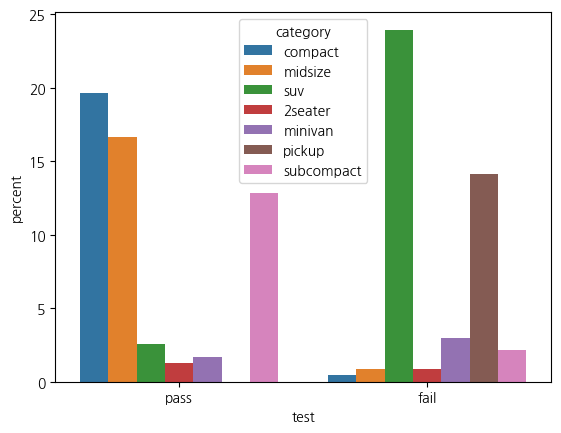

In [85]:
sns.countplot(mpg, x='test', hue='category', stat='percent');

In [86]:
np.where(mpg.total >= 30, 'A', 'B')

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B',
       'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B

In [87]:
np.where(mpg.total >= 30, 'A', np.where(mpg.total >= 20, 'B', 'C'))

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'C', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'C', 'B',
       'B', 'C', 'C', 'C', 'C', 'C', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'C', 'C', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'B',
       'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'A', 'B', 'B', 'B', 'B',
       'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'B

In [88]:
mpg['grade'] = np.where(mpg.total >= 30, 'A', np.where(mpg.total >= 20, 'B', 'C'))
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test,grade
228,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize,23.5,23.5,pass,B
163,subaru,forester awd,2.5,2008,4,auto(l4),4,20,26,r,suv,23.0,23.0,pass,B
227,volkswagen,passat,1.8,1999,4,manual(m5),f,21,29,p,midsize,25.0,25.0,pass,B
49,dodge,dakota pickup 4wd,3.7,2008,6,auto(l4),4,14,18,r,pickup,16.0,16.0,fail,C
118,hyundai,tiburon,2.0,2008,4,auto(l4),f,20,27,r,subcompact,23.5,23.5,pass,B


In [89]:
mpg.grade.value_counts()

,count
grade,
B,118
C,106
A,10


In [90]:
n_grade = mpg.grade.value_counts()
n_grade

,count
grade,
B,118
C,106
A,10


<Axes: xlabel='grade'>

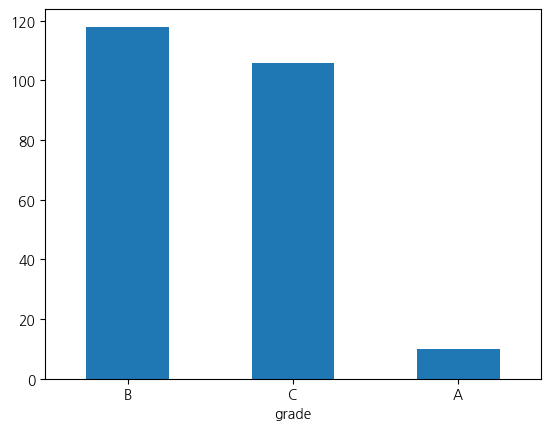

In [91]:
n_grade.plot.bar(rot=0)

In [92]:
n_grade = mpg.grade.value_counts().sort_index()
n_grade

,count
grade,
A,10
B,118
C,106


<Axes: xlabel='grade'>

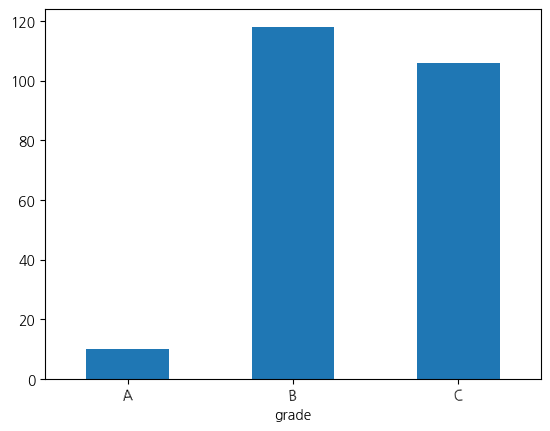

In [94]:
n_grade.plot.bar(rot=4)

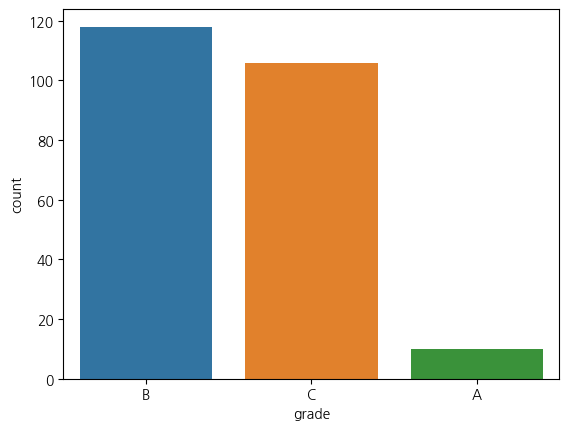

In [95]:
sns.countplot(mpg, x='grade', hue='grade');

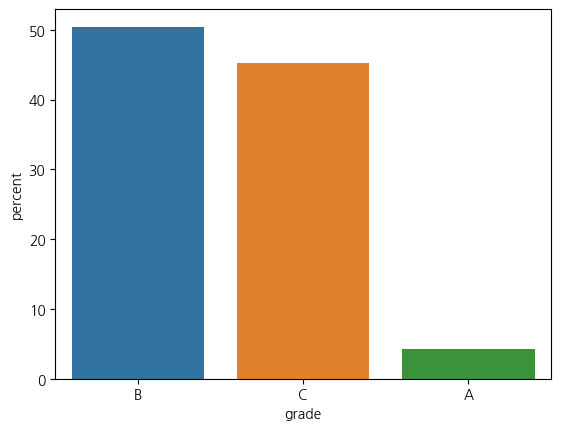

In [96]:
sns.countplot(mpg, x='grade', hue='grade', stat='percent');

In [99]:
mpg.grade.value_counts().index

Index(['B', 'C', 'A'], dtype='object', name='grade')

In [98]:
mpg.grade.value_counts().sort_index().index

Index(['A', 'B', 'C'], dtype='object', name='grade')

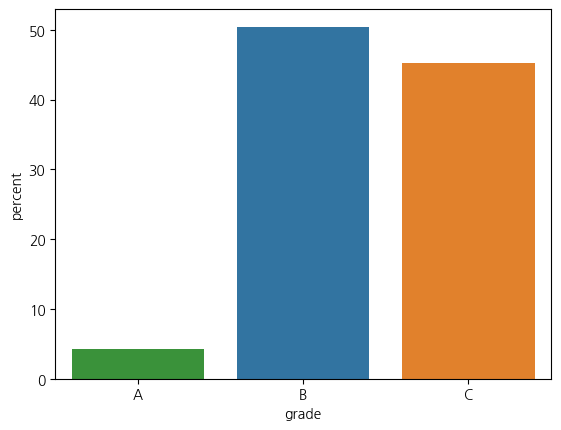

In [100]:
sns.countplot(mpg, x='grade', hue='grade', stat='percent', order=mpg.grade.value_counts().sort_index().index);

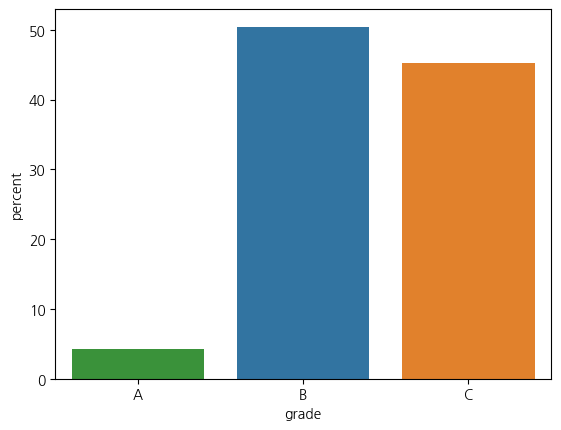

In [105]:
sns.countplot(mpg, x='grade', hue='grade', stat='percent', order=['A', 'B', 'C']);

In [106]:
mpg.grade.unique()

array(['B', 'C', 'A'], dtype=object)

In [107]:
np.sort(mpg.grade.unique())

array(['A', 'B', 'C'], dtype=object)

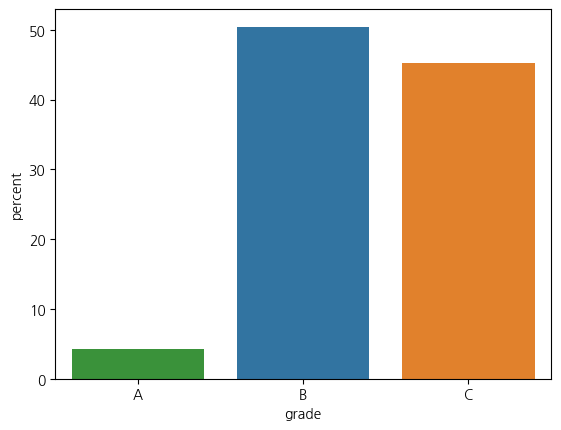

In [108]:
sns.countplot(mpg, x='grade', hue='grade', stat='percent', order=np.sort(mpg.grade.unique()));

## 메소드 체이닝

In [109]:
mpg.grade.value_counts()

,count
grade,
B,118
C,106
A,10


In [110]:
mpg.grade.value_counts().sort_index()

,count
grade,
A,10
B,118
C,106


In [111]:
d = mpg.grade.value_counts()
d.sort_index()

,count
grade,
A,10
B,118
C,106


In [113]:
mpg.grade.value_counts().sort_index(ascending=False)

,count
grade,
C,106
B,118
A,10


In [115]:
mpg['grade2'] = np.where(mpg.total >= 30, 'A', np.where(mpg.total >= 25, 'B', np.where(mpg.total >= 20, 'C', 'D')))
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test,grade,grade2
165,subaru,impreza awd,2.2,1999,4,auto(l4),4,21,26,r,subcompact,23.5,23.5,pass,B,C
38,dodge,caravan 2wd,3.0,1999,6,auto(l4),f,17,24,r,minivan,20.5,20.5,pass,B,C
161,subaru,forester awd,2.5,2008,4,manual(m5),4,20,27,r,suv,23.5,23.5,pass,B,C
208,volkswagen,gti,2.0,1999,4,auto(l4),f,19,26,r,compact,22.5,22.5,pass,B,C
143,nissan,altima,2.5,2008,4,auto(av),f,23,31,r,midsize,27.0,27.0,pass,B,B


In [126]:
mpg['grade2'] = np.where(mpg.total >= 30, 'A',
                np.where(mpg.total >= 25, 'B',
                np.where(mpg.total >= 20, 'C', 'D')))
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test,grade,grade2,size
15,audi,a6 quattro,2.8,1999,6,auto(l5),4,15,24,p,midsize,19.5,19.5,fail,C,D,large
93,ford,mustang,4.0,2008,6,auto(l5),r,16,24,r,subcompact,20.0,20.0,pass,B,C,large
35,chevrolet,malibu,3.5,2008,6,auto(l4),f,18,29,r,midsize,23.5,23.5,pass,B,C,large
228,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize,23.5,23.5,pass,B,C,large
83,ford,f150 pickup 4wd,4.2,1999,6,auto(l4),4,14,17,r,pickup,15.5,15.5,fail,C,D,large


## 연산자 |(or) 메소드 isin

In [117]:
 np.where((mpg.category == 'compact') |
                       (mpg.category == 'subcompact') |
                       (mpg.category == '2seater'), 'small', 'large')

array(['small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'large', 'large', 'large', 'large', 'large',
       'large', 'large', 'small', 'small', 'small', 'small', 'small',
       'large', 'large', 'large', 'large', 'large', 'large', 'large',
       'large', 'large', 'large', 'large', 'large', 'large', 'large',
       'large', 'large', 'large', 'large', 'large', 'large', 'large',
       'large', 'large', 'large', 'large', 'large', 'large', 'large',
       'large', 'large', 'large', 'large', 'large', 'large', 'large',
       'large', 'large', 'large', 'large', 'large', 'large', 'large',
       'large', 'large', 'large', 'large', 'large', 'large', 'large',
       'large', 'large', 'large', 'large', 'large', 'large', 'large',
       'large', 'large', 'large', 'large', 'large', 'large', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'sma

In [124]:
mpg['size'] = np.where((mpg.category == 'compact') |
                       (mpg.category == 'subcompact') |
                       (mpg.category == '2seater'), 'small', 'large')
mpg.sample(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test,grade,grade2,size
205,toyota,toyota tacoma 4wd,4.0,2008,6,manual(m6),4,15,18,r,pickup,16.5,16.5,fail,C,D,large
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize,21.5,21.5,pass,B,C,large
147,nissan,maxima,3.0,1999,6,auto(l4),f,18,26,r,midsize,22.0,22.0,pass,B,C,large


In [122]:
mpg['size'].value_counts()

,count
size,
large,147
small,87


In [128]:
mpg['size'] = np.where(mpg.category.isin(['compact', 'subcompact''2seater']), 'small', 'large')
mpg['size'].value_counts()

,count
size,
large,187
small,47


## 정리하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


<Axes: xlabel='test'>

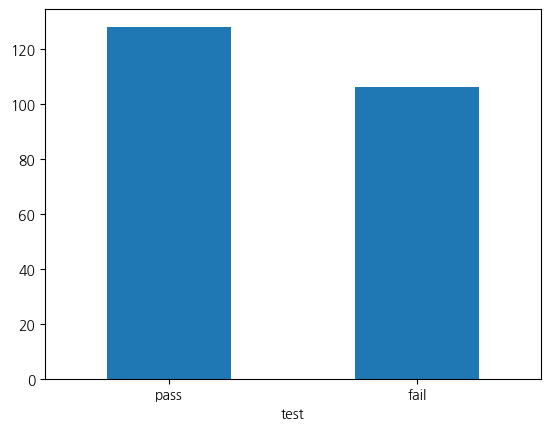

In [129]:
# 1. 패키지 로드
import pandas as pd
import numpy as np

# 2. 데이터 불러오기
mpg = pd.read_csv('data/mpg.csv')

# 3. 데이터 파악하기
mpg.shape       # 행, 열 수
mpg.head()      # 데이터 앞부분
mpg.tail()      # 데이터 뒷부분
mpg.info()      # 속성
mpg.describe()  # 요약 통계량

# 4. 변수명 바꾸기
mpg = mpg.rename(columns = {'manufacturer' : 'company'})

# 5. 파생변수 만들기
mpg['total'] = (mpg['cty'] + mpg['hwy'])/2                  # 변수 조합
mpg['test'] = np.where(mpg['total'] >= 20, 'pass', 'fail')  # 조건문 활용

# 6. 빈도 확인하기
count_test = mpg['test'].value_counts()  # 빈도표 만들기
count_test.plot.bar(rot = 0)             # 빈도 막대 그래프 만들기

## 단원 06

In [131]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.sample(5)

,id,nclass,math,english,science
1,2,1,60,97,60
2,3,1,45,86,78
13,14,4,48,87,12
5,6,2,50,89,98
14,15,4,75,56,78


In [132]:
exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       20 non-null     int64
 1   nclass   20 non-null     int64
 2   math     20 non-null     int64
 3   english  20 non-null     int64
 4   science  20 non-null     int64
dtypes: int64(5)
memory usage: 932.0 bytes


In [135]:
exam.sample(frac=.2)

,id,nclass,math,english,science
16,17,5,65,68,98
19,20,5,78,83,58
13,14,4,48,87,12
5,6,2,50,89,98


In [136]:
exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       20 non-null     int64
 1   nclass   20 non-null     int64
 2   math     20 non-null     int64
 3   english  20 non-null     int64
 4   science  20 non-null     int64
dtypes: int64(5)
memory usage: 932.0 bytes


In [137]:
exam.query("nclass == 1")

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [138]:
exam.query("nclass == 2")

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [139]:
exam.query("nclass != 2")

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12


In [141]:
exam.nclass == 2

,nclass
0,False
1,False
2,False
3,False
4,True
5,True
6,True
7,True
8,False
9,False


In [142]:
exam[exam.nclass == 2]

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [145]:
exam[exam.nclass == 2]

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [147]:
exam.query('math > 50')

,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [148]:
exam.query('english >= 80')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
8,9,3,20,98,15
9,10,3,50,98,45
11,12,3,45,85,32


In [149]:
# 1반이면서 수학 점수가 50점 이상인 경우
exam.query('nclass == 1 & math >= 50')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [150]:
exam[(exam.nclass ==1) & (exam.math >= 50)] #괄호를 반드시 사용

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [151]:
# 영어 점수가 90점 미만이거나 과학 점수가 50점 미만인 경우
exam.query('english < 90 | science <50')

,id,nclass,math,english,science
2,3,1,45,86,78
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
13,14,4,48,87,12


In [154]:
# 1, 3, 5반에 해당하면 추출
exam.query('nclass == 1 | nclass == 3 | nclass == 5')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [155]:
5 in [1, 2, 3, 4]

False

In [156]:
exam.query('nclass in [1, 3, 5]')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [157]:
exam[exam.nclass.isin([1, 3, 5])]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [158]:
nclass1 = exam.query('nclass ==1')
nclass1

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [159]:
nclass2 = exam.query('nclass ==2')
nclass2

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [160]:
nclass1.math.mean()

np.float64(46.25)

In [161]:
nclass2.english.mean()

np.float64(84.25)

In [162]:
df = pd.DataFrame({'sex'     : ['F', 'M', 'F', 'M'],
                   'country' : ['Korea', 'China', 'Japan', 'USA']})
df

,sex,country
0,F,Korea
1,M,China
2,F,Japan
3,M,USA


In [163]:
df.query('sex == "F" & country == "Korea"')

,sex,country
0,F,Korea


In [164]:
df.query("sex == 'F' & country == 'Korea'")

,sex,country
0,F,Korea


In [166]:
var = 3
exam.query('nclass == @var')

,id,nclass,math,english,science
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


In [167]:
var = 3
exam.query(f'nclass == {var}')

,id,nclass,math,english,science
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


In [168]:
df = pd.DataFrame({'num_legs' : [2, 4], 'num_wings' : [2, 0]},
                  index=['falcon', 'dog'])
df

,num_legs,num_wings
falcon,2,2
dog,4,0


In [169]:
df.isin([0, 4])

,num_legs,num_wings
falcon,False,False
dog,True,True


In [170]:
~df.isin({0, 4})

,num_legs,num_wings
falcon,True,True
dog,False,False


In [171]:
exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [172]:
exam.columns

Index(['id', 'nclass', 'math', 'english', 'science'], dtype='object')

In [173]:
exam.columns[2]

'math'

In [175]:
exam[exam.columns[2]]

,math
0,50
1,60
2,45
3,30
4,25
5,50
6,80
7,90
8,20
9,50


In [177]:
exam['math']

,math
0,50
1,60
2,45
3,30
4,25
5,50
6,80
7,90
8,20
9,50


In [182]:
exam.columns[1:3]

Index(['nclass', 'math'], dtype='object')

In [183]:
exam['math']

,math
0,50
1,60
2,45
3,30
4,25
5,50
6,80
7,90
8,20
9,50


In [187]:
exam[['nclass', 'math']]

,nclass,math
0,1,50
1,1,60
2,1,45
3,1,30
4,2,25
5,2,50
6,2,80
7,2,90
8,3,20
9,3,50


## df.drop()

In [188]:
exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [189]:
exam.drop(columns=['math', 'english'])

,id,nclass,science
0,1,1,50
1,2,1,60
2,3,1,78
3,4,1,58
4,5,2,65
5,6,2,98
6,7,2,45
7,8,2,25
8,9,3,15
9,10,3,45


In [190]:
exam.drop(2)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65


In [191]:
exam.drop([2, 4 ,6])

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
5,6,2,50,89,98
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65


In [192]:
exam.drop(index = [2, 4 ,6])

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
5,6,2,50,89,98
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65


In [193]:
exam.drop(labels=[2, 4 ,6], axis = 0)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
5,6,2,50,89,98
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65


In [195]:
exam.drop(labels=['math', 'english'], axis=1)

,id,nclass,science
0,1,1,50
1,2,1,60
2,3,1,78
3,4,1,58
4,5,2,65
5,6,2,98
6,7,2,45
7,8,2,25
8,9,3,15
9,10,3,45


In [196]:
exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [197]:
exam.query('nclass == 1')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [198]:
exam.query('nclass == 1')['math']

,math
0,50
1,60
2,45
3,30


In [199]:
exam.query('nclass == 1')[['math']]

,math
0,50
1,60
2,45
3,30


In [200]:
exam.query('nclass == 1')[['math', 'english']]

,math,english
0,50,98
1,60,97
2,45,86
3,30,98


In [202]:
exam.query('math >= 50')[['id', 'math']]

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


In [204]:
exam[exam.math >= 50][['id', 'math']]

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


In [205]:
exam[exam.math >= 50][['id', 'math']].head()

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90


In [206]:
exam[exam.math >= 50] \
    [['id', 'math']] \
    .head()

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90


## 정렬

In [207]:
exam.sort_values('math', ascending=False)

,id,nclass,math,english,science
7,8,2,90,78,25
18,19,5,89,68,87
6,7,2,80,90,45
17,18,5,80,78,90
19,20,5,78,83,58
14,15,4,75,56,78
10,11,3,65,65,65
16,17,5,65,68,98
1,2,1,60,97,60
15,16,4,58,98,65


In [208]:
exam.sort_values('math', ascending=False).head(7)

,id,nclass,math,english,science
7,8,2,90,78,25
18,19,5,89,68,87
6,7,2,80,90,45
17,18,5,80,78,90
19,20,5,78,83,58
14,15,4,75,56,78
10,11,3,65,65,65


In [210]:
exam.sort_values(['nclass', 'math']).head(7)

,id,nclass,math,english,science
3,4,1,30,98,58
2,3,1,45,86,78
0,1,1,50,98,50
1,2,1,60,97,60
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45


In [211]:
exam.sort_values(['nclass', 'math'], ascending=False).head(7)

,id,nclass,math,english,science
18,19,5,89,68,87
17,18,5,80,78,90
19,20,5,78,83,58
16,17,5,65,68,98
14,15,4,75,56,78
15,16,4,58,98,65
13,14,4,48,87,12


In [212]:
exam.sort_values(['nclass', 'math'], ascending=[True, False]).head(10)

,id,nclass,math,english,science
1,2,1,60,97,60
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
7,8,2,90,78,25
6,7,2,80,90,45
5,6,2,50,89,98
4,5,2,25,80,65
10,11,3,65,65,65
9,10,3,50,98,45


In [213]:
exam.sort_index()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [214]:
exam.sort_index(ascending=False)

,id,nclass,math,english,science
19,20,5,78,83,58
18,19,5,89,68,87
17,18,5,80,78,90
16,17,5,65,68,98
15,16,4,58,98,65
14,15,4,75,56,78
13,14,4,48,87,12
12,13,4,46,98,65
11,12,3,45,85,32
10,11,3,65,65,65


In [215]:
exam.drop(labels=[2, 4, 6], axis=0)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
5,6,2,50,89,98
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65


In [216]:
exam.drop(labels=["math", "english"], axis=1)

,id,nclass,science
0,1,1,50
1,2,1,60
2,3,1,78
3,4,1,58
4,5,2,65
5,6,2,98
6,7,2,45
7,8,2,25
8,9,3,15
9,10,3,45


## 종료